# Production Technology

The dataset contains `N = 441` firms observed over `T = 12` years, 1968-1979. There variables are: 
* `lcap`: Log of capital stock, $k_{it}$ 
* `lemp`: log of employment, $\ell_{it}$ 
* `ldsa`: log of deflated sales, $y_{it}$
* `year`: the calendar year of the observation, `year` $ = 1968, ..., 1979$, 
* `firmid`: anonymized indicator variable for the firm, $i = 1, ..., N$, with $N=441$. 

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
import seaborn as sns
import matplotlib.pyplot as plt
import LinearModelsPS2_post as lm
from tabulate import tabulate
from scipy.stats import chi2

In [22]:
# Read data
dat = pd.read_csv('firms.csv')



In [23]:
# Estimering af Pooled OLS:
pooled_ols = smf.ols('ldsa ~ lcap + lemp', data=dat).fit()                            

# Print OLS
print("Pooled OLS:\n", pooled_ols.summary()) 

Pooled OLS:
                             OLS Regression Results                            
Dep. Variable:                   ldsa   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 2.807e+04
Date:                Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:12:45   Log-Likelihood:                -2125.9
No. Observations:                5292   AIC:                             4258.
Df Residuals:                    5289   BIC:                             4277.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.536e-08      0.005   3.09

In [24]:
# Check if the panel is balanced
N = dat.firmid.nunique()
T = dat.year.nunique()
assert dat.shape[0] == N * T, f'Error: data is not a balanced panel'

# Convert data to panel structure
dat = dat.set_index(['firmid', 'year'])

In [25]:
# Estimering Fixed Effects (FE)
FE_model = PanelOLS.from_formula('ldsa ~ lcap + lemp + EntityEffects', data=dat).fit()                           

# Print Fixed Effects (FE)
print("\nFixed Effects:\n", FE_model.summary)


Fixed Effects:
                           PanelOLS Estimation Summary                           
Dep. Variable:                   ldsa   R-squared:                        0.4766
Estimator:                   PanelOLS   R-squared (Between):              0.9004
No. Observations:                5292   R-squared (Within):               0.4766
Date:                Wed, Feb 19 2025   R-squared (Overall):              0.8918
Time:                        11:12:45   Log-likelihood                    3426.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2207.9
Entities:                         441   P-value                           0.0000
Avg Obs:                       12.000   Distribution:                  F(2,4849)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):             2207.9
           

In [26]:
# Estimering Random Effects (RE)
RE_model = RandomEffects.from_formula('ldsa ~ lcap + lemp', data=dat).fit()            

# Print Random Effects (RE)
print("\nRandom Effects:\n", RE_model.summary)


Random Effects:
                         RandomEffects Estimation Summary                        
Dep. Variable:                   ldsa   R-squared:                        0.6425
Estimator:              RandomEffects   R-squared (Between):              0.9163
No. Observations:                5292   R-squared (Within):               0.4732
Date:                Wed, Feb 19 2025   R-squared (Overall):              0.9073
Time:                        11:12:45   Log-likelihood                    3161.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4752.8
Entities:                         441   P-value                           0.0000
Avg Obs:                       12.000   Distribution:                  F(2,5290)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):             4752.8
          

In [27]:
# Hypotesetest: Konstant skalaafkast
beta_k, beta_l = fe_model.params['lcap'], fe_model.params['lemp']
wald_stat = ((beta_k + beta_l - 1) ** 2) / (fe_model.cov.iloc[0, 0] + fe_model.cov.iloc[1, 1])
p_value = 1 - chi2.cdf(wald_stat, 1)

# Hausman-test mellem FE og RE
diff = fe_model.params - re_model.params
var_diff = fe_model.cov + re_model.cov
hausman_stat = diff.T @ np.linalg.inv(var_diff) @ diff
hausman_p_value = 1 - chi2.cdf(hausman_stat, len(diff))

print(f"\nWald-test for konstant skalaafkast: Test-statistik = {wald_stat:.3f}, p-værdi = {p_value:.3f}")
print(f"\nHausman-test mellem FE og RE: Test-statistik = {hausman_stat:.3f}, p-værdi = {hausman_p_value:.3f}")

NameError: name 'fe_model' is not defined

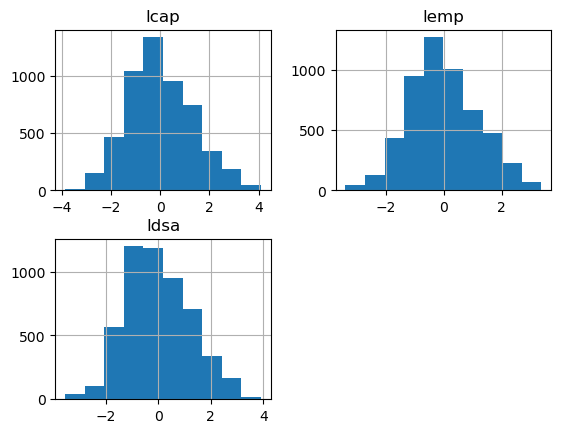

In [ ]:
# Visualiseringer
dat[['lcap', 'lemp', 'ldsa']].hist()
plt.show()

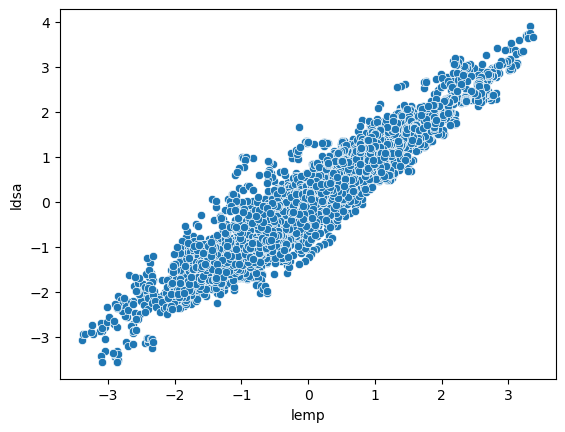

In [ ]:
sns.scatterplot(x='lemp', y='ldsa', data=dat)
plt.show()

**$\textcolor{red}{HJÆLPE}$ $\textcolor{red}{KODER}$**

In [ ]:
# Indlæs data
dat = pd.read_csv('firms.csv')

dat = dat[dat["year"] < 1971]
print(dat)

      firmid  year      lcap      lemp      ldsa
0          1  1968  0.998602 -0.242185  0.349053
1          1  1969  0.925214 -0.241278  0.312492
2          1  1970  0.879616 -0.265134  0.347566
12         2  1968 -0.069588 -0.323021 -0.945831
13         2  1969 -0.056724 -0.358177 -1.143830
...      ...   ...       ...       ...       ...
5269     440  1969 -0.228757  0.031242 -0.246864
5270     440  1970 -0.038354  0.062158 -0.345710
5280     441  1968 -1.618390 -1.944210 -2.032340
5281     441  1969 -1.635030 -1.856580 -2.011210
5282     441  1970 -1.454890 -1.538940 -1.371550

[1323 rows x 5 columns]


In [ ]:
dat.sample(5) 

,firmid,year,lcap,lemp,ldsa
2808,235,1968,-2.417230,-2.405200,-2.384830
1872,157,1968,-1.320150,-1.167060,-1.276300
614,52,1970,0.771141,0.410786,-0.140076
5114,427,1970,-0.582111,-0.456240,-0.652100
1201,101,1969,-0.234161,0.043742,-0.339365


In [ ]:
dat.year.unique()

array([1968, 1969, 1970])

# Descriptives

In [ ]:
dat.describe()

,firmid,year,lcap,lemp,ldsa
count,1323.000000,1323.000000,1.323000e+03,1.323000e+03,1.323000e+03
mean,221.000000,1969.000000,-3.432577e-08,5.291005e-09,3.253968e-08
std,127.353547,0.816805,1.367661e+00,1.212370e+00,1.238870e+00
min,1.000000,1968.000000,-3.864950e+00,-3.108660e+00,-3.433130e+00
25%,111.000000,1968.000000,-9.629080e-01,-8.435585e-01,-9.082370e-01
50%,221.000000,1969.000000,-1.016350e-01,-1.141760e-01,-1.142770e-01
75%,331.000000,1970.000000,9.708763e-01,8.067791e-01,8.648864e-01
max,441.000000,1970.000000,3.993508e+00,3.187258e+00,3.418170e+00


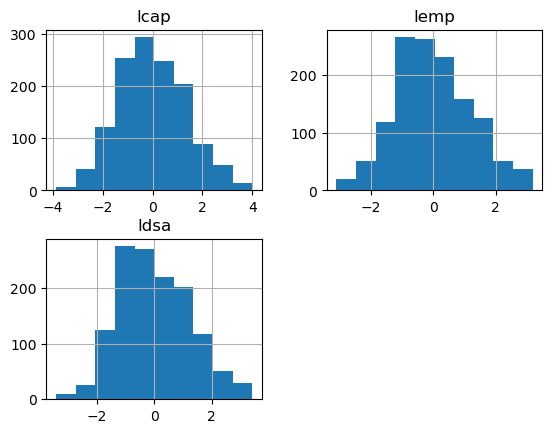

In [ ]:
dat[['lcap','lemp','ldsa']].hist();

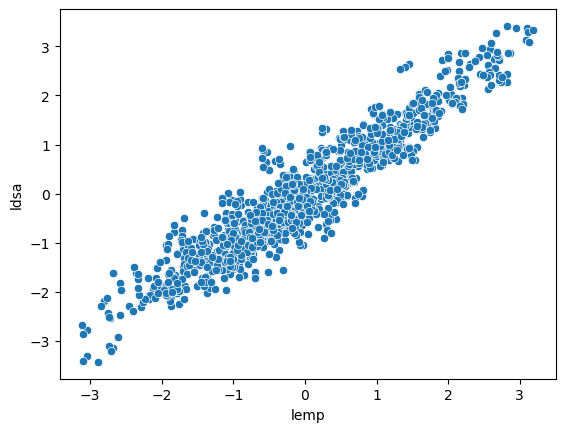

In [ ]:
sns.scatterplot(x='lemp', y='ldsa', data=dat); 

# Converting data to numpy format 

In [ ]:
dat.ldsa.values.shape

(1323,)

In [ ]:
N = dat.firmid.unique().size
T = dat.year.unique().size
assert dat.shape[0] == N*T, f'Error: data is not a balanced panel'
print(f'Data has N={N} and T={T}')

Data has N=441 and T=3


Extract data from `pandas` to `numpy` arrays. 

In [ ]:
y = dat.ldsa.values.reshape((N*T,1))

ones = np.ones((N*T,1))
l = dat.lemp.values.reshape((N*T,1))
k = dat.lcap.values.reshape((N*T,1))
X = np.hstack([ones, l, k])

xlbl = ["constant", "lcap", "lemp"]
ylbl = ["ldsa"]

**Pooled OLS**

In [30]:
#Pooled OLS
estimation_POLS = lm.estimate(y, X, robust_se=True, T=T)
lm.print_table((ylbl, xlbl), estimation_POLS, title="POLS")

TypeError: estimate() got an unexpected keyword argument 'robust_se'